# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
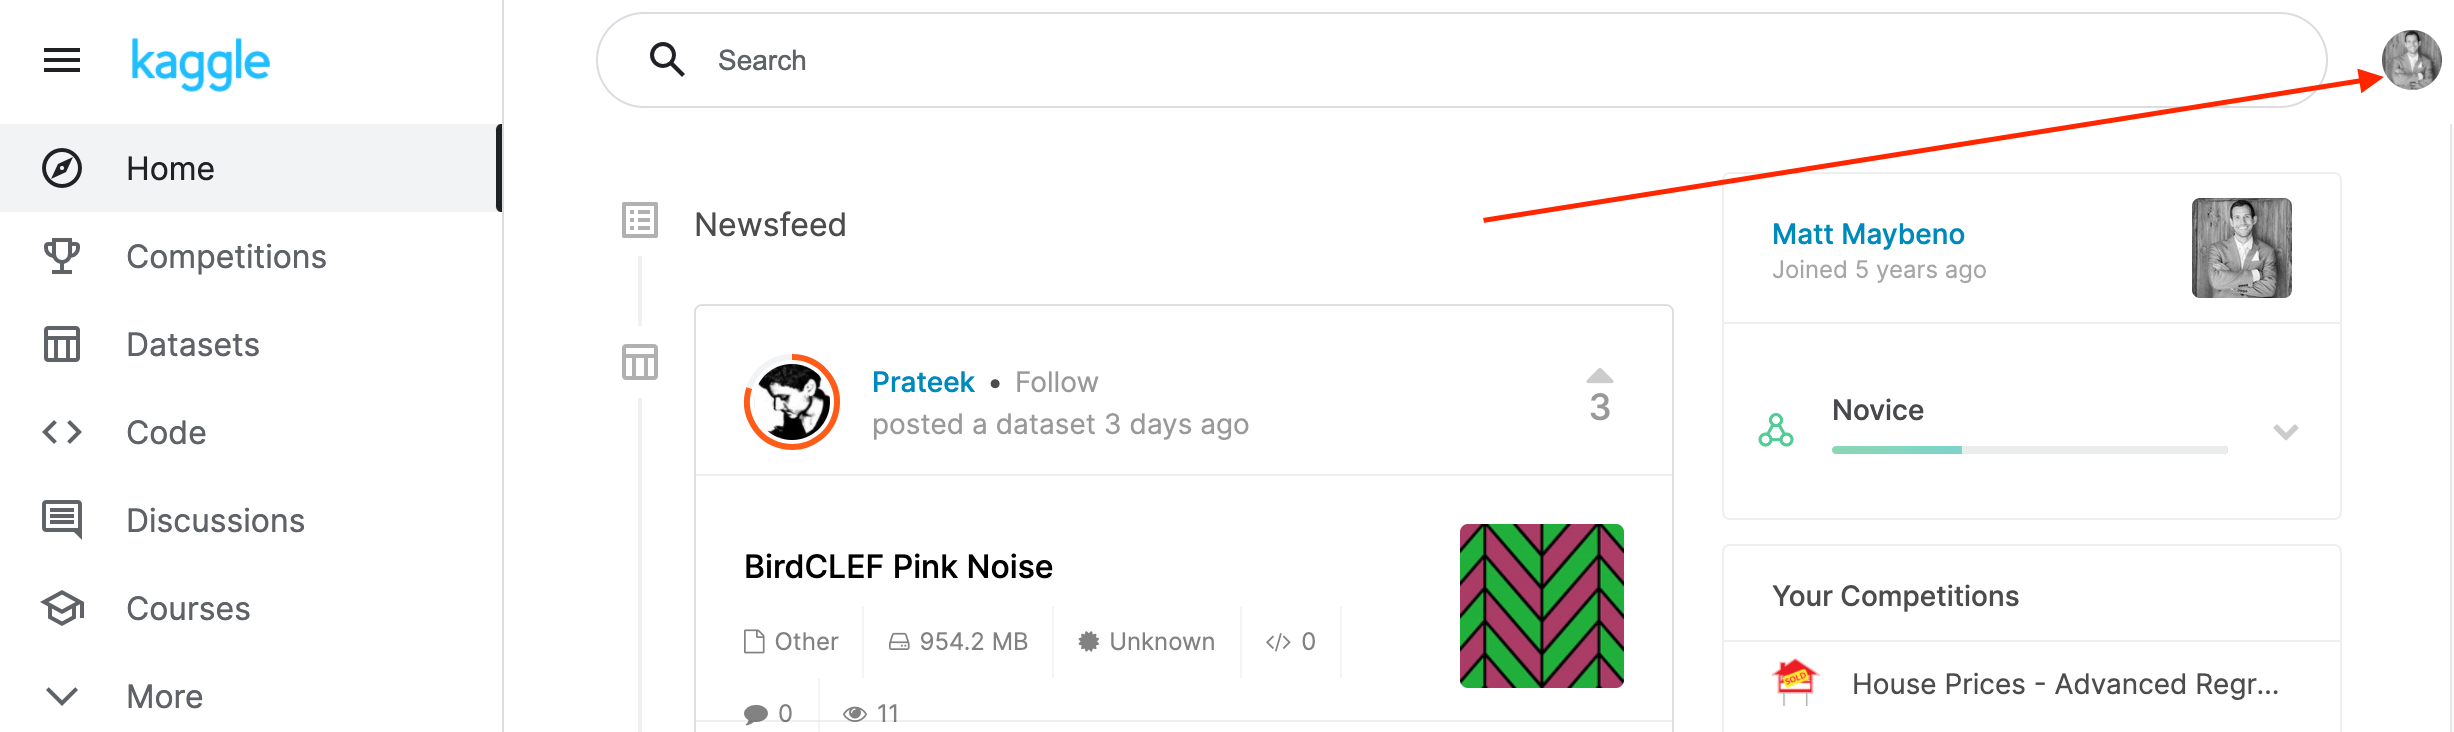
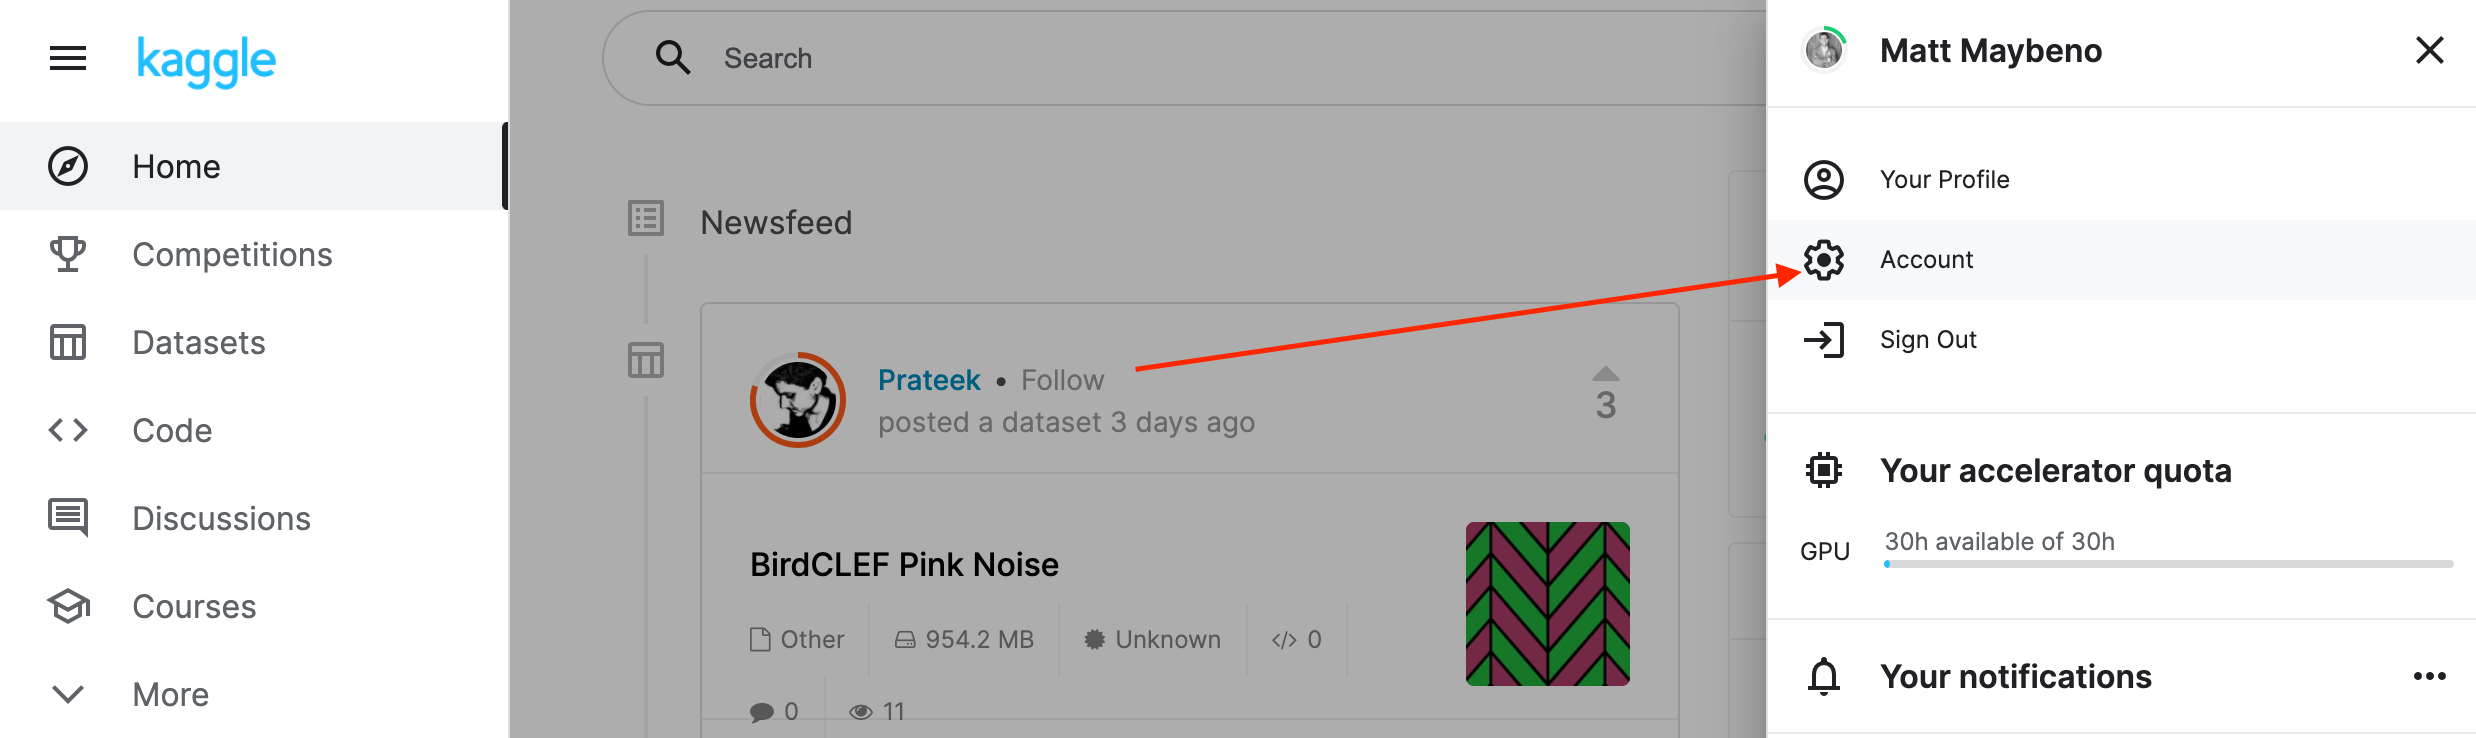
2. Scroll down to API and click Create New API Token.
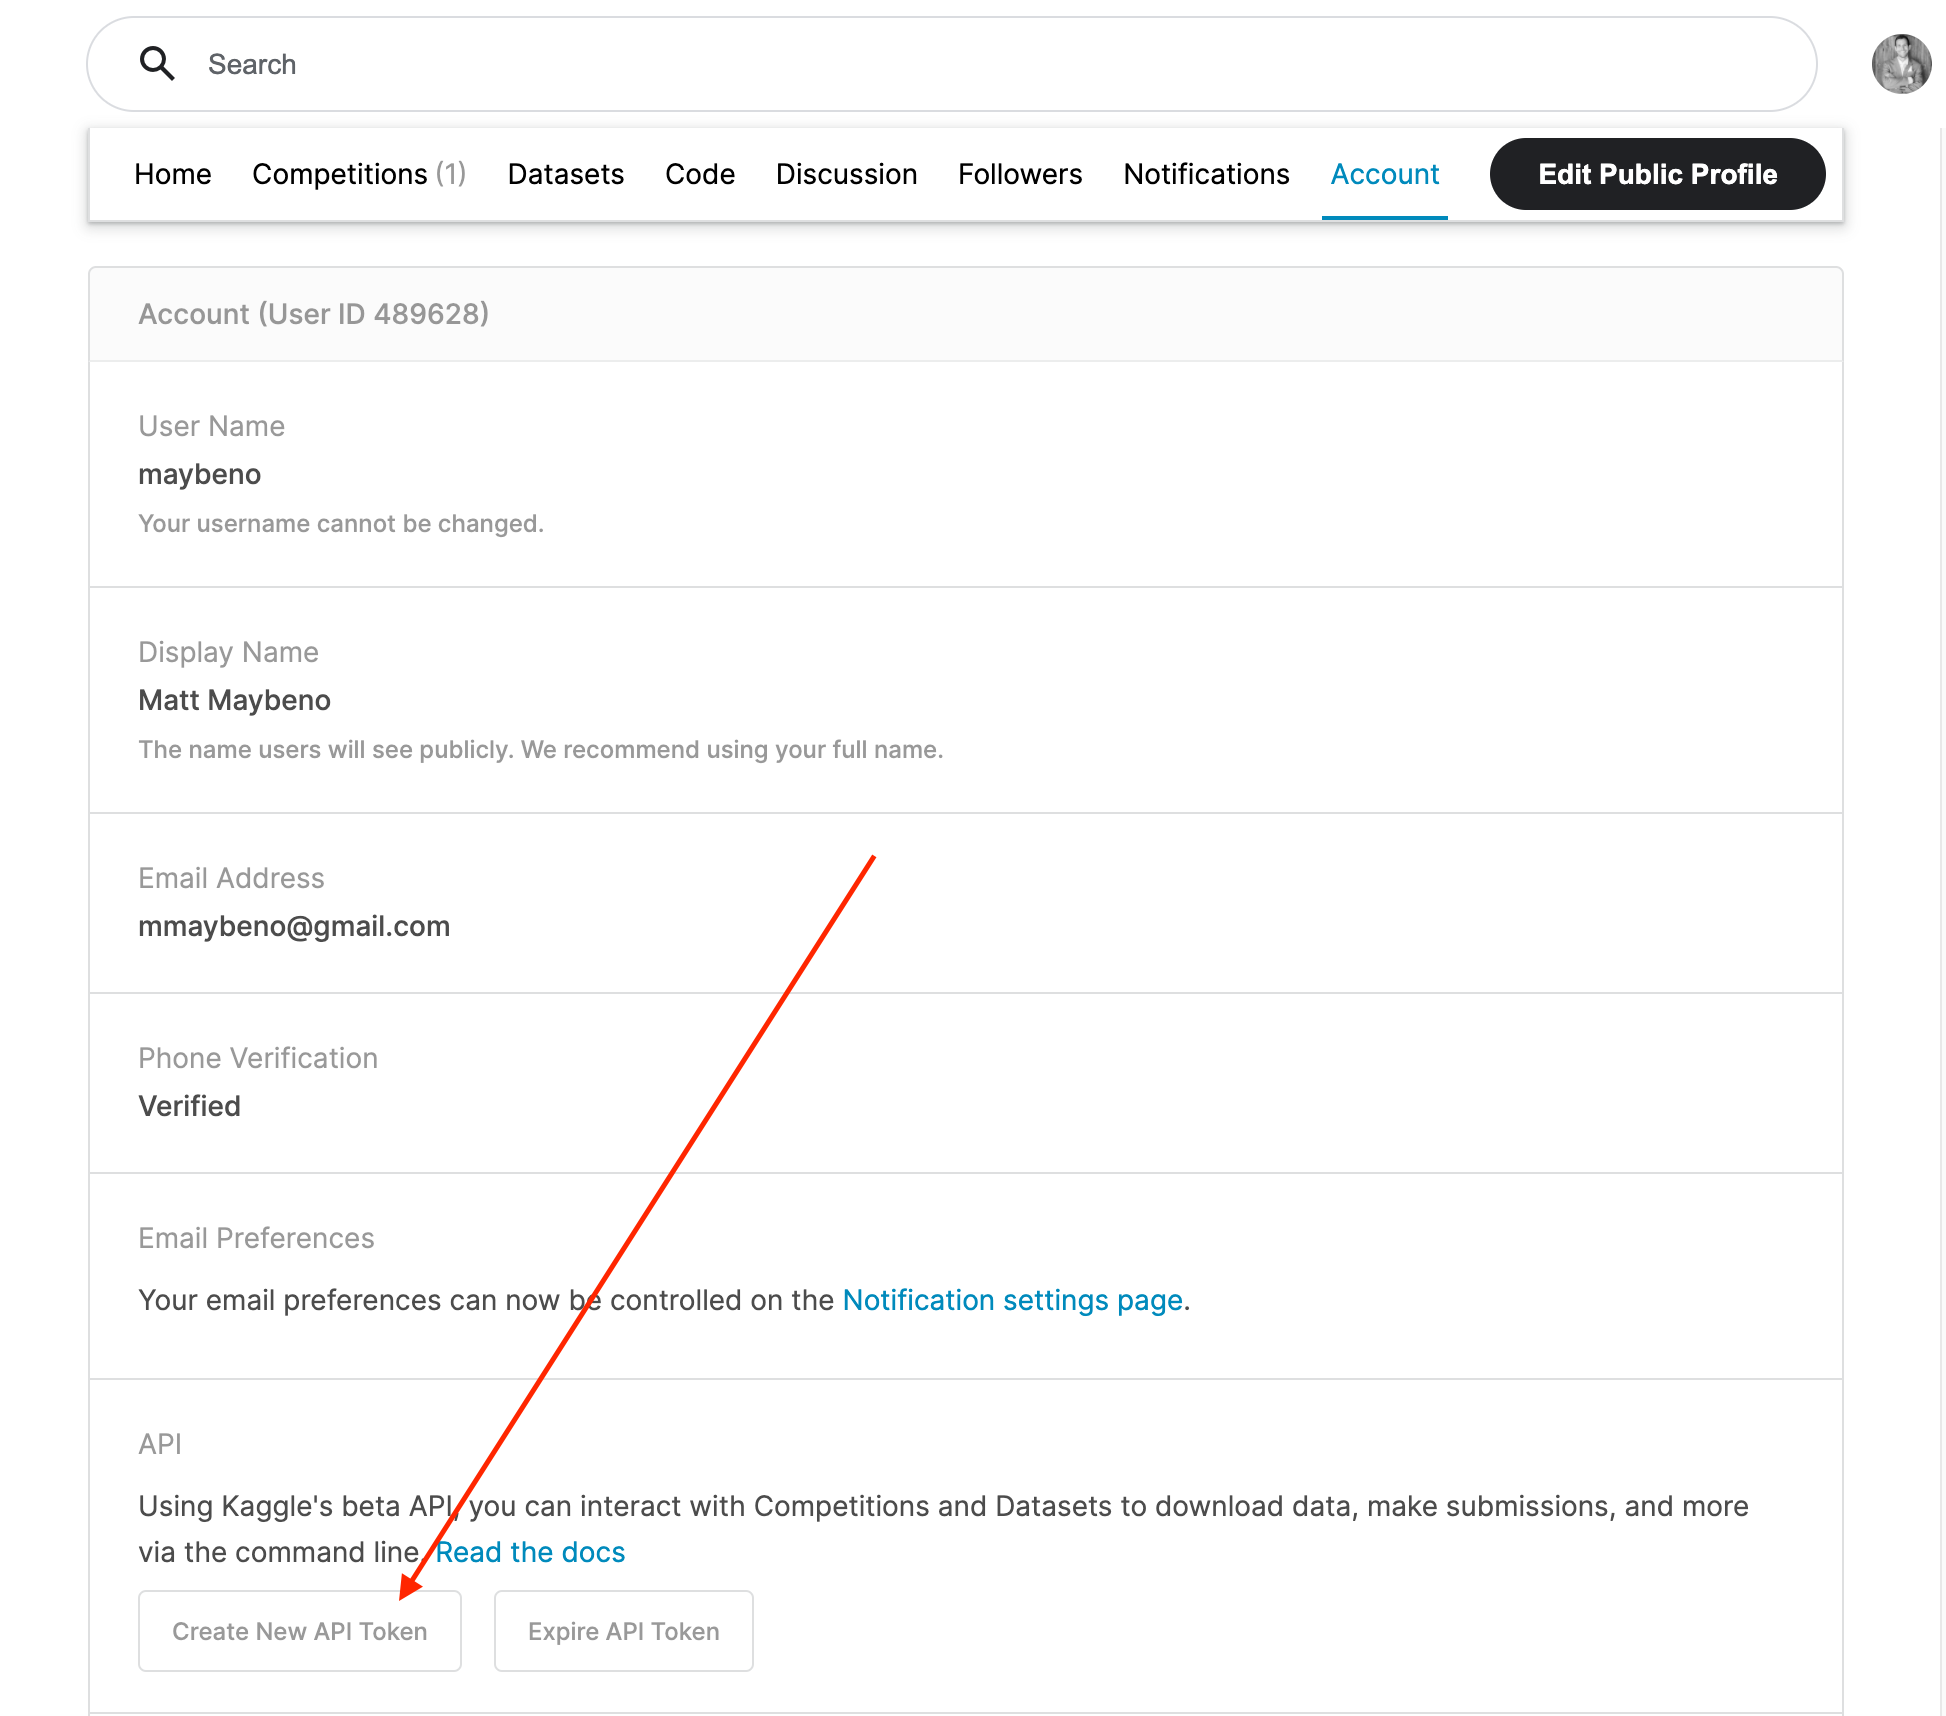
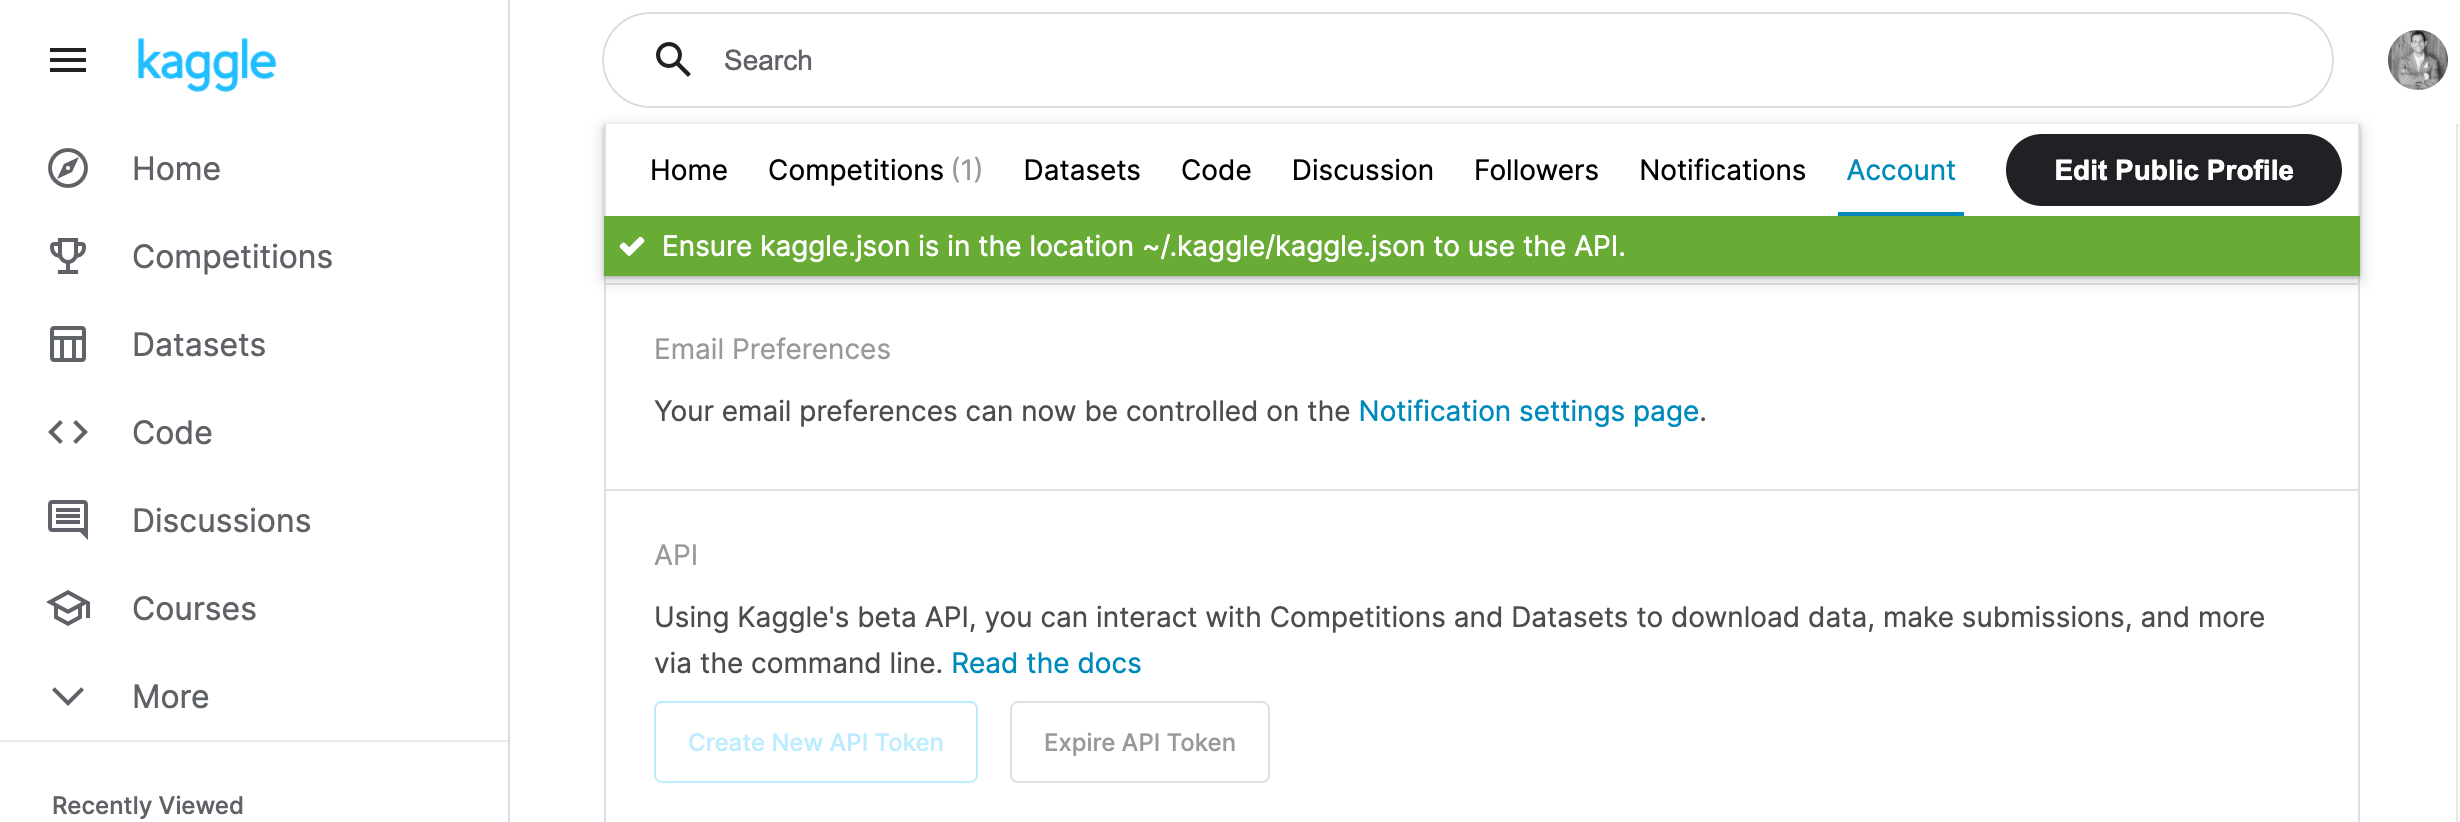
3. Open up `kaggle.json` and use the username and key.
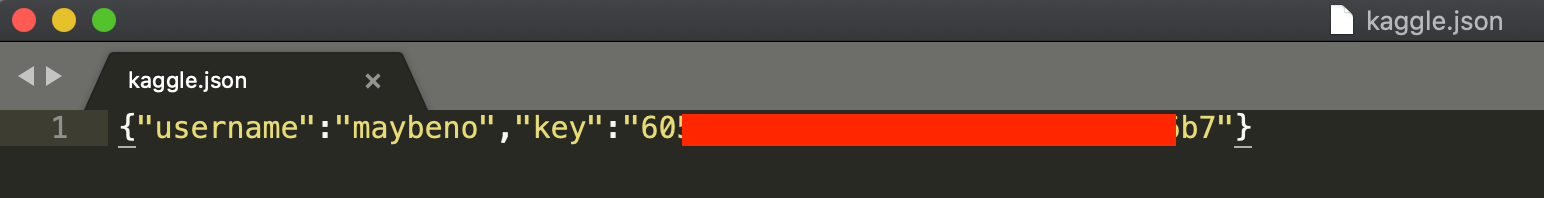

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [5]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-67.8.0-py3-none-any.whl (1.1 MB)
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 182.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

### Setup Kaggle API Key

In [6]:
pip install kaggle

  Using cached kaggle-1.5.13-py3-none-any.whl
  Using cached python_slugify-8.0.1-py2.py3-none-any.whl (9.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "jatin369"
kaggle_key = "cf1d7ab1755bd96fc626ad881f694dbd"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
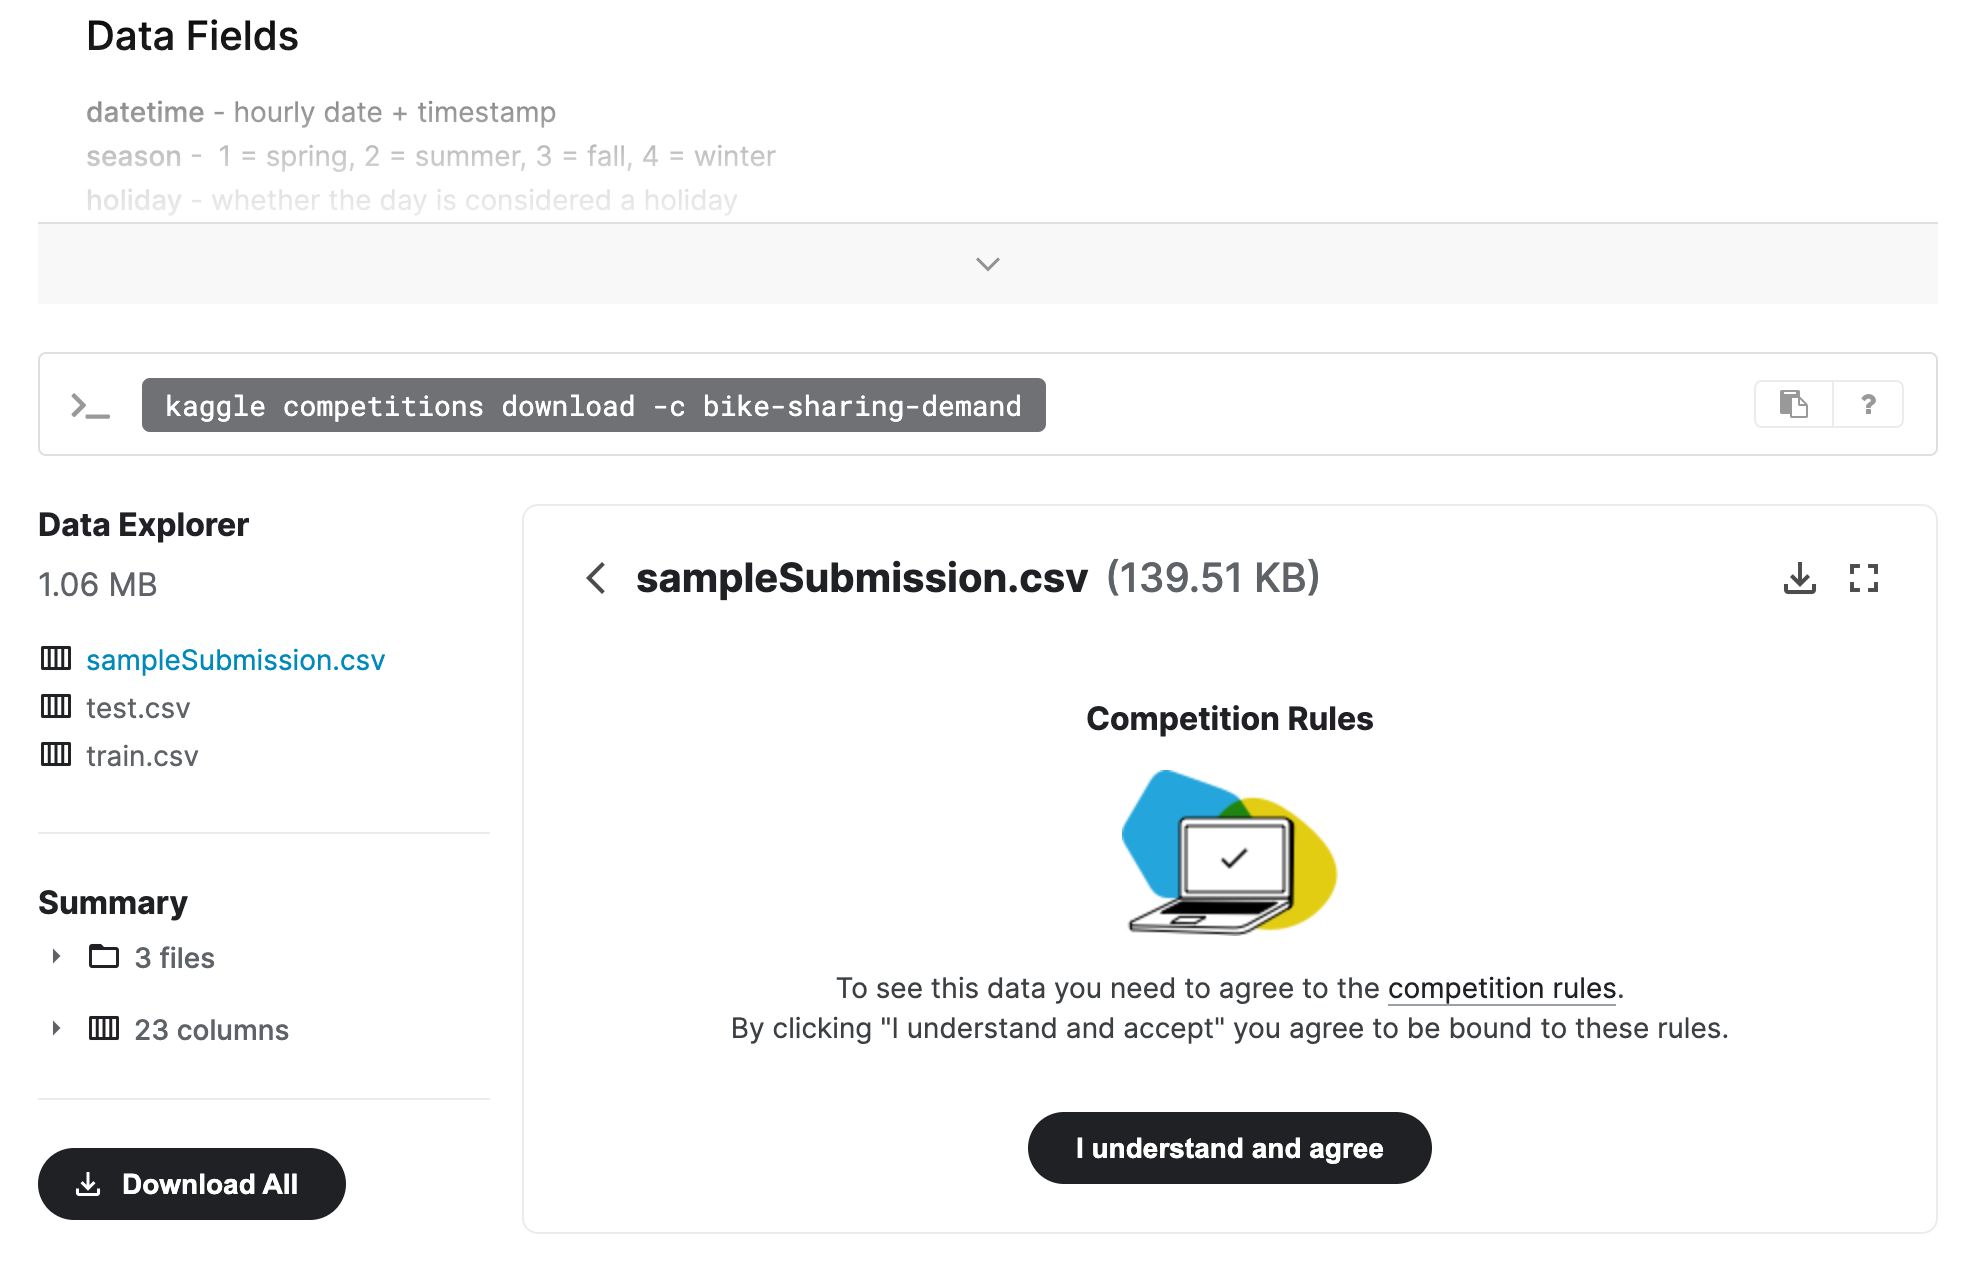

In [9]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [10]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates = ['datetime'])
#train['datetime'] = pd.to_datetime(train['datetime'])
#train['hour'] = train['datetime'].dt.hour
print(train.head())
train.dtypes

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [12]:
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [13]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates = ['datetime'])
print(test.head())
test.dtypes

             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014  


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

In [14]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [15]:
predictor = TabularPredictor(
    label='count',
    problem_type = 'regression',
    eval_metric = 'root_mean_squared_error',
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train, time_limit = 600, presets = 'best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230603_100109/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230603_100109/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3035.49 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features

### Review AutoGluon's training run with ranking of models that did the best.

In [16]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.631863      11.531370  467.254615                0.001065           0.384321            3       True         16
1   RandomForestMSE_BAG_L2  -53.349513      10.476229  403.345391                0.591668          25.824587            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.874226      10.457287  385.378890                0.572726           7.858085            2       True         14
3          LightGBM_BAG_L2  -55.156718      10.097901  395.247261                0.213340          17.726457            2       True         11
4          CatBoost_BAG_L2  -55.667919       9.939307  438.456278                0.054745          60.935473            2       True         13
5   NeuralNetFastAI_BAG_L2  -58.033820      10.152572  415.461165         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602

### Create predictions from test dataset

In [17]:
transformed_training_data = predictor.transform_features(train)

# Print the transformed training dataset
#print(transformed_training_data.head())
#transformed_training_data.drop(['casual', 'registered'], axis = 1, inplace = True)
print(transformed_training_data.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

              datetime  datetime.year  datetime.month  datetime.day  \
0  1293840000000000000           2011               1             1   
1  1293843600000000000           2011               1             1   
2  1293847200000000000           2011               1             1   
3  1293850800000000000           2011               1             1   
4  1293854400000000000           2011               1             1   

   datetime.dayofweek  
0                   5  
1                   5  
2                   5  
3       

In [18]:
type(test['datetime'][0])
pd.to_datetime(test['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])

# Extract year, month, day, hour, minute, and second components
test['datetime.year'] = test['datetime'].dt.year
test['datetime.month'] = test['datetime'].dt.month
test['datetime.day'] = test['datetime'].dt.day
test['datetime.dayofweek'] = test['datetime'].dt.dayofweek

test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  datetime.year  datetime.month  datetime.day  \
0        56    26.0027           2011               1            20   
1        56     0.0000           2011               1            20   
2        56     0.0000           2011               1            20   
3        56    11.0014           2011               1            20   
4        56    11.0014           2011               1            20   

   datetime.dayofweek  
0                   3  
1                   3  
2                   3  
3                   3  
4                   3

In [19]:
test['datetime'] = pd.to_numeric(test['datetime'])
test['casual'] = 0
test['registered'] = 0
predictor = TabularPredictor.load("AutogluonModels/ag-20230603_100109/")
predictions = predictor.predict(test, transform_features = False)

predictions.head()

0    25.063417
1    41.671810
2    45.888992
3    48.719604
4    51.381927
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [20]:
# Describe the `predictions` series to see if there are any negative values
?
predictions.describe().transpose()

count    6493.000000
mean      101.611008
std        89.642685
min         0.370327
25%        24.330345
50%        65.943848
75%       170.449020
max       364.633087
Name: count, dtype: float64


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

In [21]:
# How many negative values do we have?
(predictions < 0).sum()

0

In [22]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [23]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [24]:
#

In [25]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [26]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "jatin369"
kaggle_key = "cf1d7ab1755bd96fc626ad881f694dbd"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [30]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 388kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [31]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-06-03 10:16:27  first raw submission               complete  1.78173      1.78173       
submission.csv               2023-06-03 10:16:04  first raw submission               complete  1.78173      1.78173       
submission_new_hpo.csv       2023-06-03 06:45:07  new features with hyperparameters  complete  0.51982      0.51982       
submission_new_features.csv  2023-06-03 06:30:37  new features                       complete  0.75670      0.75670       
tail: write error: Broken pipe


#### Initial score of `?`

In [32]:
print("New Score of : ", 1.78173)

New Score of :  1.78173


In [33]:
leaderboard = predictor.leaderboard(silent=True)

# Retrieve the best model's score
leaderboard

model   score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3  -52.631863      11.531370  467.254615   
1   RandomForestMSE_BAG_L2  -53.349513      10.476229  403.345391   
2     ExtraTreesMSE_BAG_L2  -53.874226      10.457287  385.378890   
3          LightGBM_BAG_L2  -55.156718      10.097901  395.247261   
4          CatBoost_BAG_L2  -55.667919       9.939307  438.456278   
5   NeuralNetFastAI_BAG_L2  -58.033820      10.152572  415.461165   
6        LightGBMXT_BAG_L2  -60.441074      13.824224  424.368595   
7    KNeighborsDist_BAG_L1  -84.125061       0.039758    0.029520   
8      WeightedEnsemble_L2  -84.125061       0.040629    0.572633   
9    KNeighborsUnif_BAG_L1 -101.546199       0.039364    0.032938   
10  RandomForestMSE_BAG_L1 -116.544294       0.529173   10.109997   
11    ExtraTreesMSE_BAG_L1 -124.588053       0.509969    4.929568   
12         CatBoost_BAG_L1 -130.478761       0.129936  192.549731   
13         LightGBM_BAG_L1 -131.054162       1.530036   22.676524   
14       LightGBMXT_BAG_L1 -131.460909       6.826587   57.118245   
15  NeuralNetFastAI_BAG_L1 -135.921818       0.279738   90.074283   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.001065           0.384321            3       True   
1                 0.591668          25.824587            2       True   
2                 0.572726           7.858085            2       True   
3                 0.213340          17.726457            2       True   
4                 0.054745          60.935473            2       True   
5                 0.268011          37.940360            2       True   
6                 3.939662          46.847790            2       True   
7                 0.039758           0.029520            1       True   
8                 0.000871           0.543113            2       True   
9                 0.039364           0.032938            1       True   
10                0.529173          10.109997            1       True   
11                0.509969           4.929568            1       True   
12                0.129936         192.549731            1       True   
13                1.530036          22.676524            1       True   
14                6.826587          57.118245            1       True   
15                0.279738          90.074283            1       True   

    fit_order  
0          16  
1          12  
2          14  
3          11  
4          13  
5          15  
6          10  
7           2  
8           9  
9           1  
10          5  
11          7  
12          6  
13          4  
14          3  
15          8

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

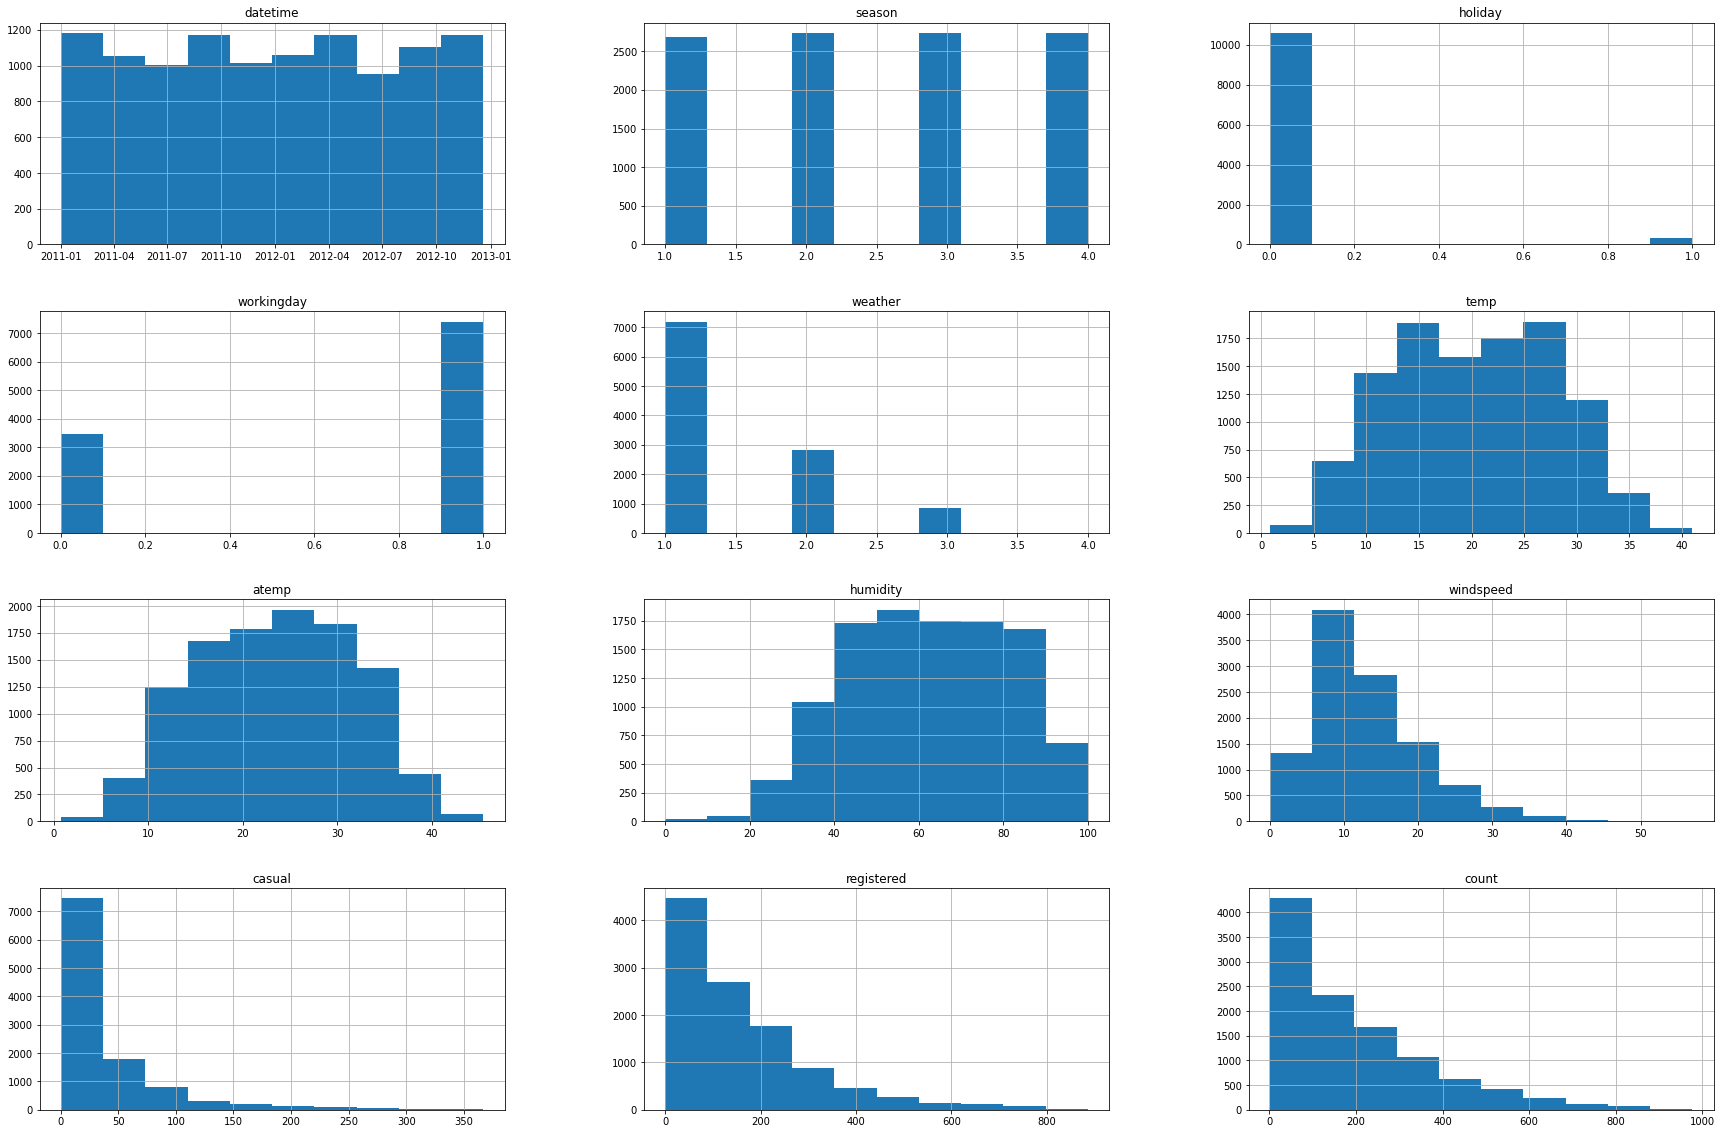

In [34]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize = (30, 20))

In [35]:
# create a new feature
#train[?] = ?
#test[?] = ?
print(train.head())
train['temp_diff'] = train['temp'] - train['atemp']
test['temp_diff'] = test['temp'] - test['atemp']

train['hour'] = train['datetime'].dt.hour
test['datetime'] = pd.to_datetime(test['datetime'])
test['hour'] = test['datetime'].dt.hour
print(test.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  1

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [36]:
train["season"] = train['season'].astype('category')
train["weather"] = train['season'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['season'].astype('category')

train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  temp_diff  hour  
0        81        0.0       3          13     16     -4.555     0  
1        80        0.0       8          32     40     -4.615     1  
2        80        0.0       5          27     32     -4.615     2  
3        75        0.0       3          10     13     -4.555     3  
4        75        0.0       0           1      1     -4.555     4

In [37]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  temp_diff  hour  
0        81        0.0       3          13     16     -4.555     0  
1        80        0.0       8          32     40     -4.615     1  
2        80        0.0       5          27     32     -4.615     2  
3        75        0.0       3          10     13     -4.555     3  
4        75        0.0       0           1      1     -4.555     4

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>],
       [<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'temp_diff'}>,
        <AxesSubplot:title={'center':'hour'}>]], dtype=object)

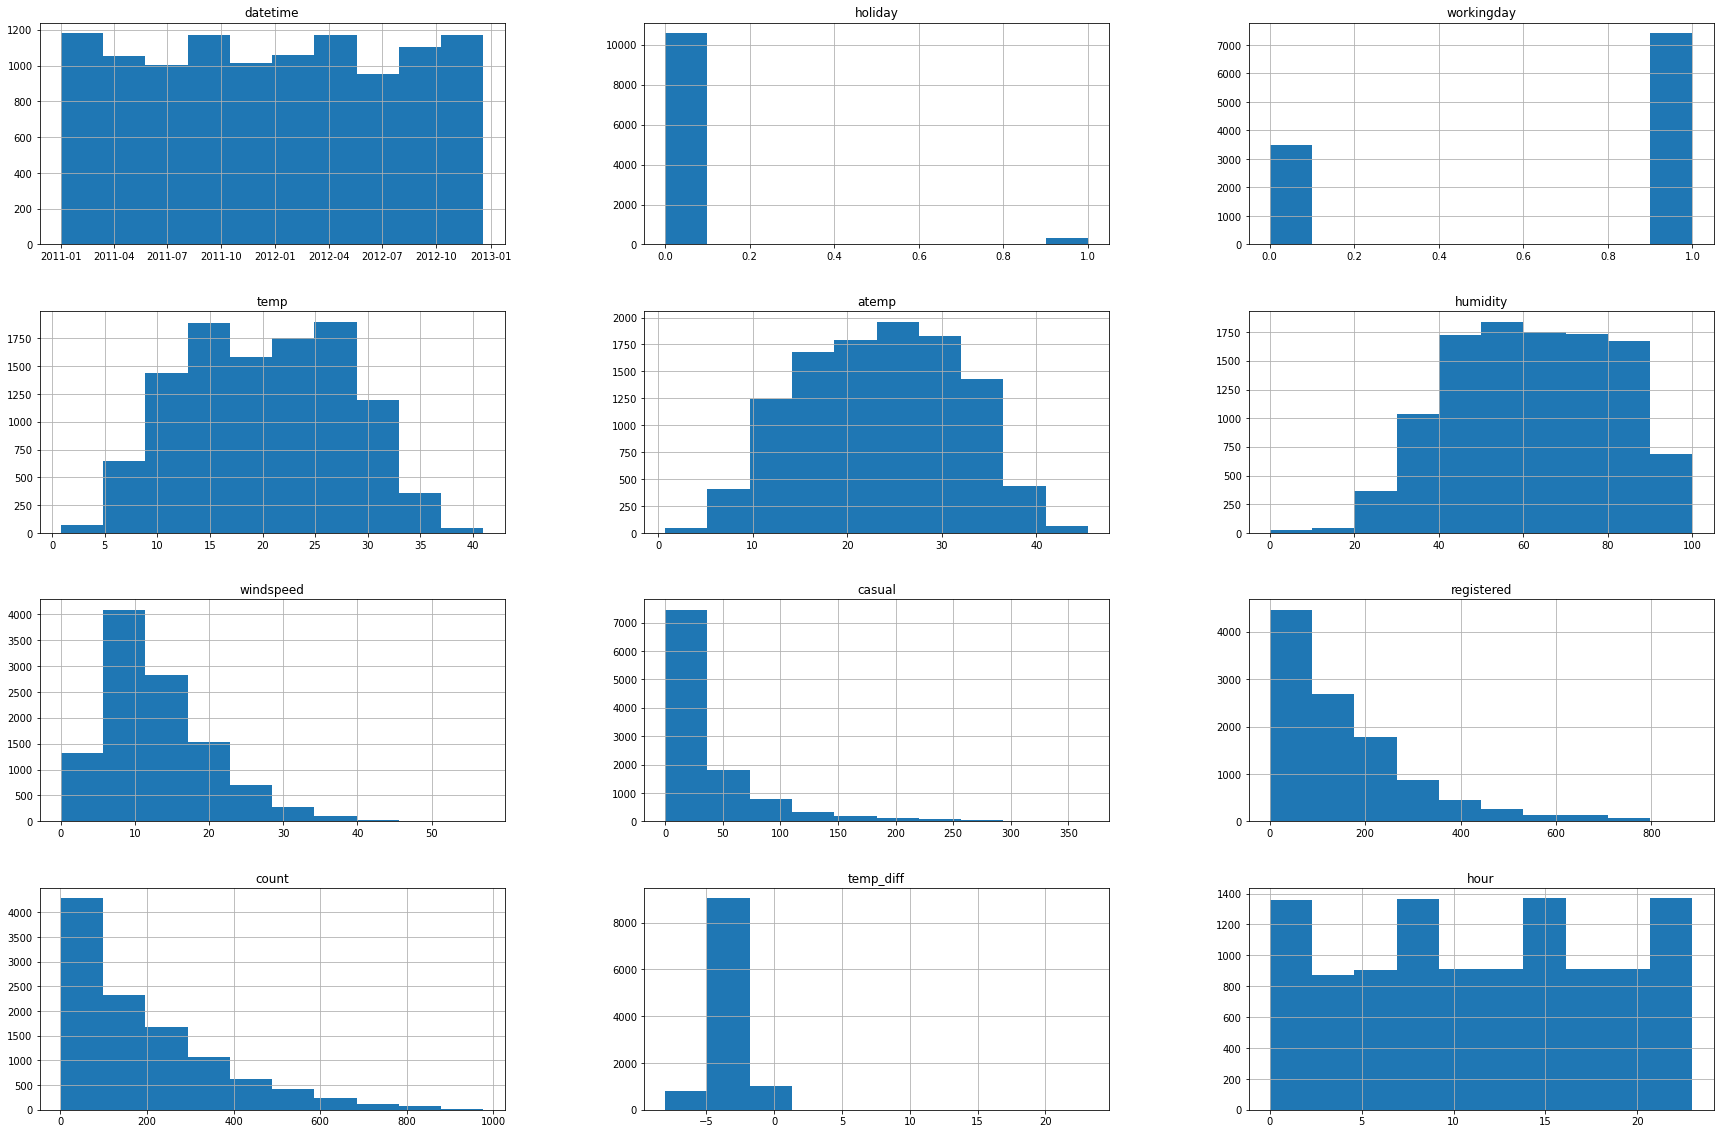

In [38]:
# View histogram of all features again now with the hour feature
train.hist(figsize = (30, 20))

## Step 5: Rerun the model with the same settings as before, just with more features

In [39]:
predictor_new_features = TabularPredictor(
    label = 'count', 
    problem_type = 'regression', 
    eval_metric = 'root_mean_squared_error',
    learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(
    train,
    time_limit = 600, 
    presets = 'best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230603_101757/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230603_101757/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2088.24 MB
	Train Data (Original)  Memory Usage: 0.81 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features

In [40]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -31.085725      32.455884  533.370402                0.000938           0.487137            3       True         15
1          CatBoost_BAG_L2  -31.416202      30.135504  478.281839                0.067892          83.178852            2       True         13
2          LightGBM_BAG_L2  -31.526332      30.368068  415.812895                0.300456          20.709908            2       True         11
3        LightGBMXT_BAG_L2  -31.951696      31.442367  420.328355                1.374755          25.225367            2       True         10
4     ExtraTreesMSE_BAG_L2  -32.552894      30.711843  403.769138                0.644231           8.666151            2       True         14
5   RandomForestMSE_BAG_L2  -32.877153      30.675297  424.723114         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -36.317481341559755,
  'LightGBM_BAG_L1': -

In [41]:
test['datetime'] = pd.to_numeric(test['datetime'])
predictor_new_features = TabularPredictor.load("AutogluonModels/ag-20230603_101757/")
predictions_new_features = predictor_new_features.predict(test, transform_features = False)
predictions_new_features.head()

0    14.874349
1    12.055519
2    11.243652
3     9.273218
4     7.830737
Name: count, dtype: float32

In [42]:
# How many negative values do we have?
(predictions_new_features<0).sum()

0

In [43]:
# Remember to set all negative values to zero
predictions[predictions<0] = 0

In [44]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [45]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 291kB/s]
Successfully submitted to Bike Sharing Demand

In [46]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-06-03 10:31:50  new features                       complete  0.76319      0.76319       
submission.csv               2023-06-03 10:16:27  first raw submission               complete  1.78173      1.78173       
submission.csv               2023-06-03 10:16:04  first raw submission               complete  1.78173      1.78173       
submission_new_hpo.csv       2023-06-03 06:45:07  new features with hyperparameters  complete  0.51982      0.51982       
tail: write error: Broken pipe


#### New Score of `?`

In [47]:
print("New Score of : ", 0.76319)

New Score of :  0.76319


## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [48]:
num_trials = 5
search_strategy = 'auto'
hyperparameters = {
    'NN': {'num_epochs': 20, 'batch_size': 32}, 
    'GBM': {'num_boost_round': 50},
}
hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}
predictor_new_hpo = TabularPredictor(
      label="count", 
      problem_type="regression", 
      eval_metric="root_mean_squared_error", 
      learner_kwargs={"ignored_columns": ["casual", "registered"]}
  ).fit(
      train_data=train, time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230603_103208/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230603_103208/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2005.53 MB
	Train Data (Original)  Memory Usage: 0.81 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features

In [49]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -38.574297       1.262472  310.073996                0.001111           0.856475            3       True         12
1    LightGBM_BAG_L2/T5  -38.607197       1.261236  293.220009                0.001666          16.221272            2       True         11
2    LightGBM_BAG_L2/T2  -39.381820       1.259695  292.996248                0.000125          15.997511            2       True          8
3   WeightedEnsemble_L2  -40.289816       0.550425  113.135340                0.000657           0.309838            2       True          6
4    LightGBM_BAG_L1/T5  -40.380141       0.263381   58.890243                0.263381          58.890243            1       True          5
5    LightGBM_BAG_L2/T3  -41.013181       1.259706  292.921089                0.000136      

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -54.85538374980926,
  'LightGBM_BAG_L1/T2': -41.265662652489915,
  'LightGBM_BAG_L1/T3': -50.50023573668397,
  'LightGBM_BAG_L1/T4': -141.70078934627324,
  'LightGBM_BAG_L1/T5': -40.38014121295539,
  'WeightedEnsemble_L2': -40.28981555044202,
  'LightGBM_BAG_L2/T1': -41.15086915174581,
  'LightGBM_BAG_L2/T2': -39.3818

In [50]:
predictor_hyper = TabularPredictor.load("AutogluonModels/ag-20230603_103208/")
predictions_hyper = predictor_hyper.predict(test, transform_features = False)
predictions_hyper.head()

0    14.684107
1     8.511178
2     8.381889
3     8.381889
4     8.381889
Name: count, dtype: float32

In [51]:
# How many negative values do we have?
(predictions_hyper<0).sum()

0

In [52]:
# Remember to set all negative values to zero
predictions[predictions<0] = 0

In [53]:
# Same submitting predictions
submission_new_hpo = submission
submission_new_hpo["count"] = predictions_hyper
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [54]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 389kB/s]
Successfully submitted to Bike Sharing Demand

In [55]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-06-03 10:45:14  new features with hyperparameters  complete  0.52598      0.52598       
submission_new_features.csv  2023-06-03 10:31:50  new features                       complete  0.76319      0.76319       
submission.csv               2023-06-03 10:16:27  first raw submission               complete  1.78173      1.78173       
submission.csv               2023-06-03 10:16:04  first raw submission               complete  1.78173      1.78173       
tail: write error: Broken pipe


#### New Score of `?`

In [57]:
print("New Score of : ", 0.52598)

New Score of :  0.52598


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [58]:
initial_score = predictor.leaderboard(silent = 'True')['score_val'][0]
feature_addition = predictor_new_features.leaderboard(silent = 'True')['score_val'][0]
hyperparametertuning_score = predictor_new_hpo.leaderboard(silent = 'True')['score_val'][0]
print("Initial model - best score: ", initial_score)
print("Added features, new score: ", feature_addition)
print("New Features + Hyperparameter tuning: ", hyperparametertuning_score)

Initial model - best score:  -52.63186262808237
Added features, new score:  -31.085724533714913
New Features + Hyperparameter tuning:  -38.57429716994095


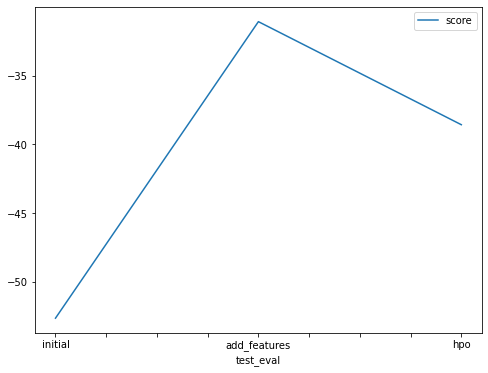

In [63]:
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [initial_score, feature_addition, hyperparametertuning_score]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

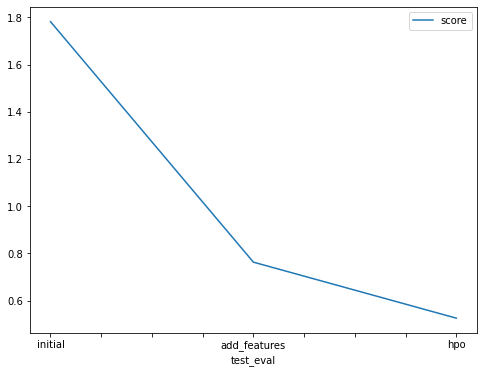

In [64]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.78173, 0.76319, 0.52598]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [62]:
# The 3 hyperparameters we tuned with the kaggle score as the result
resultant = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['default_vals', 'default_vals', 'NN'],
    "hpo2": ['default_vals', 'default_vals', 'GBM'],
    "hpo3": ['default_vals', 'default_vals', 'num_bag_folds'],
    "score": [1.78173, 0.76319, 0.52598]
})
resultant

model          hpo1          hpo2           hpo3    score
0       initial  default_vals  default_vals   default_vals  1.78173
1  add_features  default_vals  default_vals   default_vals  0.76319
2           hpo            NN           GBM  num_bag_folds  0.52598

In [115]:
#